# EDA - анализ

Подгружаем датафрейм и основные бибилиотеки.

In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

import datetime

!pip install wordcloud
from wordcloud import WordCloud

warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable


**целевые переменные**: {likes, reposts, views, comments}

**числовые переменные**: {price}

**категориальные переменные**: {catalog_category, time_category}

In [2]:
data = pd.read_csv('category1.csv')
data

,Unnamed: 0,date,likes,reposts,views,comments,name,price,product_category,catalog_category,time,time_category
0,0,11.04.2024,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами,2590,платья,платья,12:54:55,дневное
1,1,11.04.2024,23,19,4581,0,Трикотажные платья-макси с открытой спинкой,2690,платья,платья,07:03:53,утреннее
2,2,09.04.2024,40,35,9721,0,Хлопковые костюмы с жилетом,2690,костюмы,комплекты,10:31:03,утреннее
3,3,09.04.2024,37,21,6313,0,Идеальное пляжное платье с открытой спинкой,2550,платья,платья,08:16:50,утреннее
4,4,09.04.2024,35,22,10655,0,Трикотажные платья-бандо по фигуре,2550,платья,платья,06:02:21,утреннее
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1211,17.02.2023,30,31,11002,0,Платье-свитер в полосочку на молнии,2390,платья,платья,02:08:00,ночное
1212,1212,16.02.2023,28,36,8779,0,Тройной купальник с высокой посадкой,1690,купальники,купальники,23:38:00,ночное
1213,1213,16.02.2023,35,35,10657,2,Комплект с юбкой и джемпером,3290,платья,платья,20:50:34,вечернее
1214,1214,16.02.2023,20,22,12509,0,Боди с ассиметричным вырезом,1550,боди,блузки/рубашки/свитера,15:40:54,дневное


Чтобы избавиться от повторной индексации, удалим столбец Unnamed: 0.

In [3]:
data = data.drop(columns=['Unnamed: 0'])
data

,date,likes,reposts,views,comments,name,price,product_category,catalog_category,time,time_category
0,11.04.2024,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами,2590,платья,платья,12:54:55,дневное
1,11.04.2024,23,19,4581,0,Трикотажные платья-макси с открытой спинкой,2690,платья,платья,07:03:53,утреннее
2,09.04.2024,40,35,9721,0,Хлопковые костюмы с жилетом,2690,костюмы,комплекты,10:31:03,утреннее
3,09.04.2024,37,21,6313,0,Идеальное пляжное платье с открытой спинкой,2550,платья,платья,08:16:50,утреннее
4,09.04.2024,35,22,10655,0,Трикотажные платья-бандо по фигуре,2550,платья,платья,06:02:21,утреннее
...,...,...,...,...,...,...,...,...,...,...,...
1211,17.02.2023,30,31,11002,0,Платье-свитер в полосочку на молнии,2390,платья,платья,02:08:00,ночное
1212,16.02.2023,28,36,8779,0,Тройной купальник с высокой посадкой,1690,купальники,купальники,23:38:00,ночное
1213,16.02.2023,35,35,10657,2,Комплект с юбкой и джемпером,3290,платья,платья,20:50:34,вечернее
1214,16.02.2023,20,22,12509,0,Боди с ассиметричным вырезом,1550,боди,блузки/рубашки/свитера,15:40:54,дневное


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1216 non-null   object
 1   likes             1216 non-null   int64 
 2   reposts           1216 non-null   int64 
 3   views             1216 non-null   int64 
 4   comments          1216 non-null   int64 
 5   name              1216 non-null   object
 6   price             1216 non-null   int64 
 7   product_category  1216 non-null   object
 8   catalog_category  1216 non-null   object
 9   time              1216 non-null   object
 10  time_category     1216 non-null   object
dtypes: int64(5), object(6)
memory usage: 104.6+ KB


Посмотрим на основные статистики для вещественных признаков.

In [5]:
data.describe() 

,likes,reposts,views,comments,price
count,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,66.271382,53.652961,19246.893092,0.934211,2348.772204
std,90.885884,74.843857,17995.595506,2.363080,522.109499
min,4.000000,0.000000,4526.000000,0.000000,1100.000000
25%,29.000000,22.000000,10901.000000,0.000000,1790.000000
50%,44.000000,34.000000,15179.000000,0.000000,2450.000000
75%,68.000000,57.000000,20749.000000,1.000000,2690.000000
max,1160.000000,941.000000,206031.000000,39.000000,4950.000000


**Выводы из анализа основных статистик**

*likes:* в среднем пост набирает 66-67 лайков, однако, медианное количество лайков (50% квантиль) составило 44, т.е. меньше среднего. Получается, что в сообществе встречается большое количество постов, где количесво лайков выше среднего. Довольно большое стандартное отклонение: примерно 91 лайк.

*reposts:* в среднем пост набирает 53-54 репоста. Медианное значение ниже среднего (34 репоста), т.е. можно сказать, что в сообществе встречаются посты, которые набирают количество репостов больше среднего. Стандартное отклонение составляет 74-75, что довольно велико.

*views:* в среднем пост просматривают около 19000 человек. Медианное значение просмотров равно 15179. Получается, что большое количество постов особенно популярно (просмотры выше среднего). Стандартное отклонение около 18000.

*comments:* в среднем пост набирает 1 комментарий, стандартное отклонение составляет 2.36. Это позволяет предположить, что люди не особо склонны оставлять комментраии.

*price:* в среднем цена товара составляет 2348-2349. Медианное значение цены составляет 2450, т.е. в сообществе часто встречаются товары, цена которых выше среднего. Стандартное отклонение около 522. Можно сделать выводы о том, что в сообществе представлены товары по доступной цене.


# Анализ выбросов

In [6]:
def norm(data):    
    mu = np.mean(data.astype(float))  # Среднее значение
    sigma = np.std(data.astype(float))  # Стандартное отклонение    
    x = np.linspace(0, data.astype(float).max(), 1000)     
    y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp((-1/2) * ((x - mu) / sigma)**2) #функция плотности нормального распределения
    return plt.plot(x, y, color = 'r')

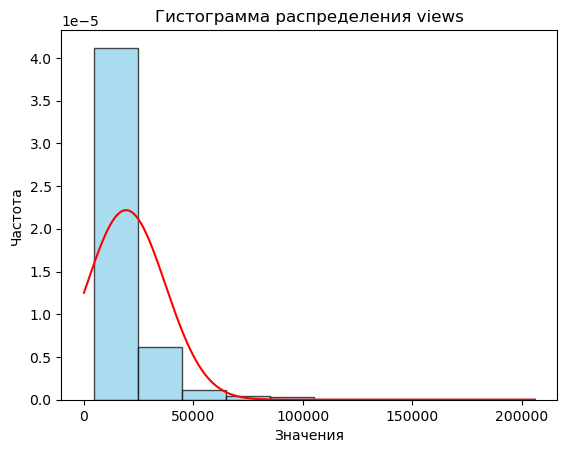

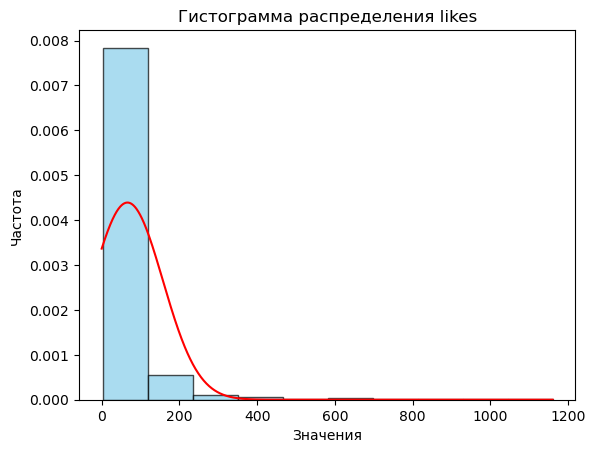

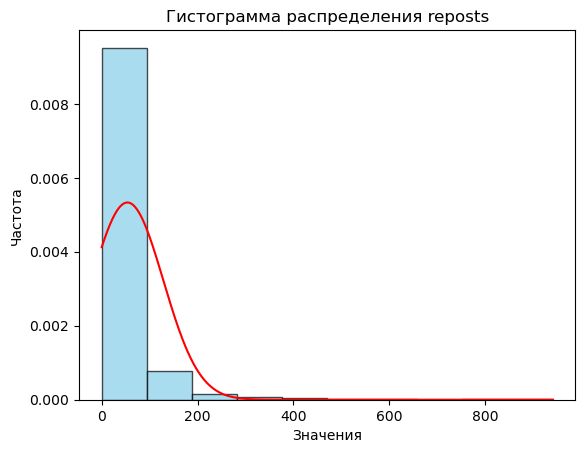

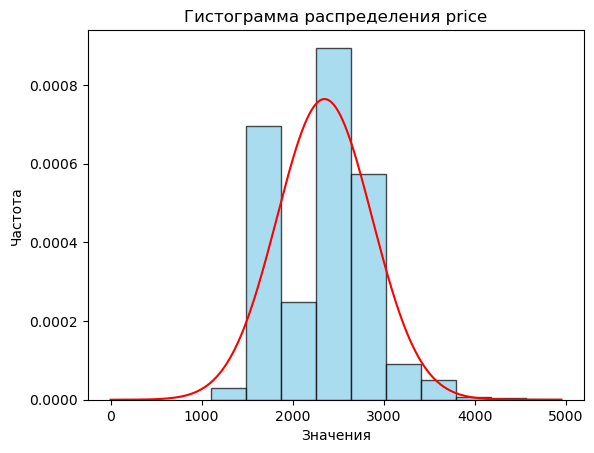

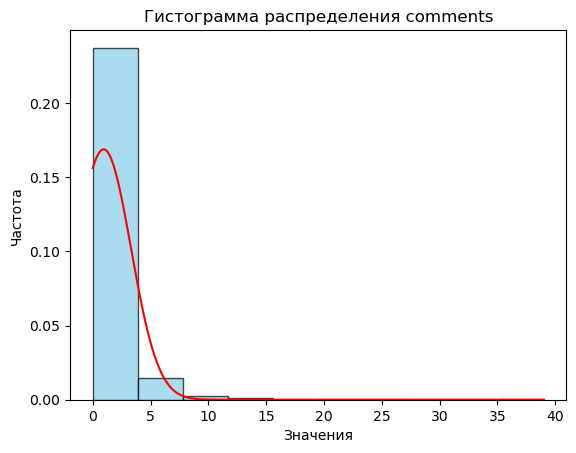

In [7]:
p={'likes', 'reposts','views','comments','price'} 
for i in p: 
    plt.hist(data[i], bins=10, color='skyblue', density=True, alpha=0.7, edgecolor = 'black') 
    plt.title(f'Гистограмма распределения {i}')
    plt.xlabel('Значения')  
    plt.ylabel('Частота')
    norm(data[i])
    plt.show()

Преимущественно наблюдается скос данных влево, выбросы располагаются в правом хвосте, который соотвествует экстремально большим значениям метрик анализируемых постов.

Просмотрев распределение данных, были обнаружены выюросы. Однако, данные выбросы ценны для нашего исследования и поэтому мы не будем их удалять.

# Анализ зависимостей

Для начала рассмотрим взаимосвязи между всеми признаками датафрейма, чтобы выявить наиболее выраженные зависимости, необходимые для нашего анализа.

Text(0.5, 1.02, 'График зависимостей')

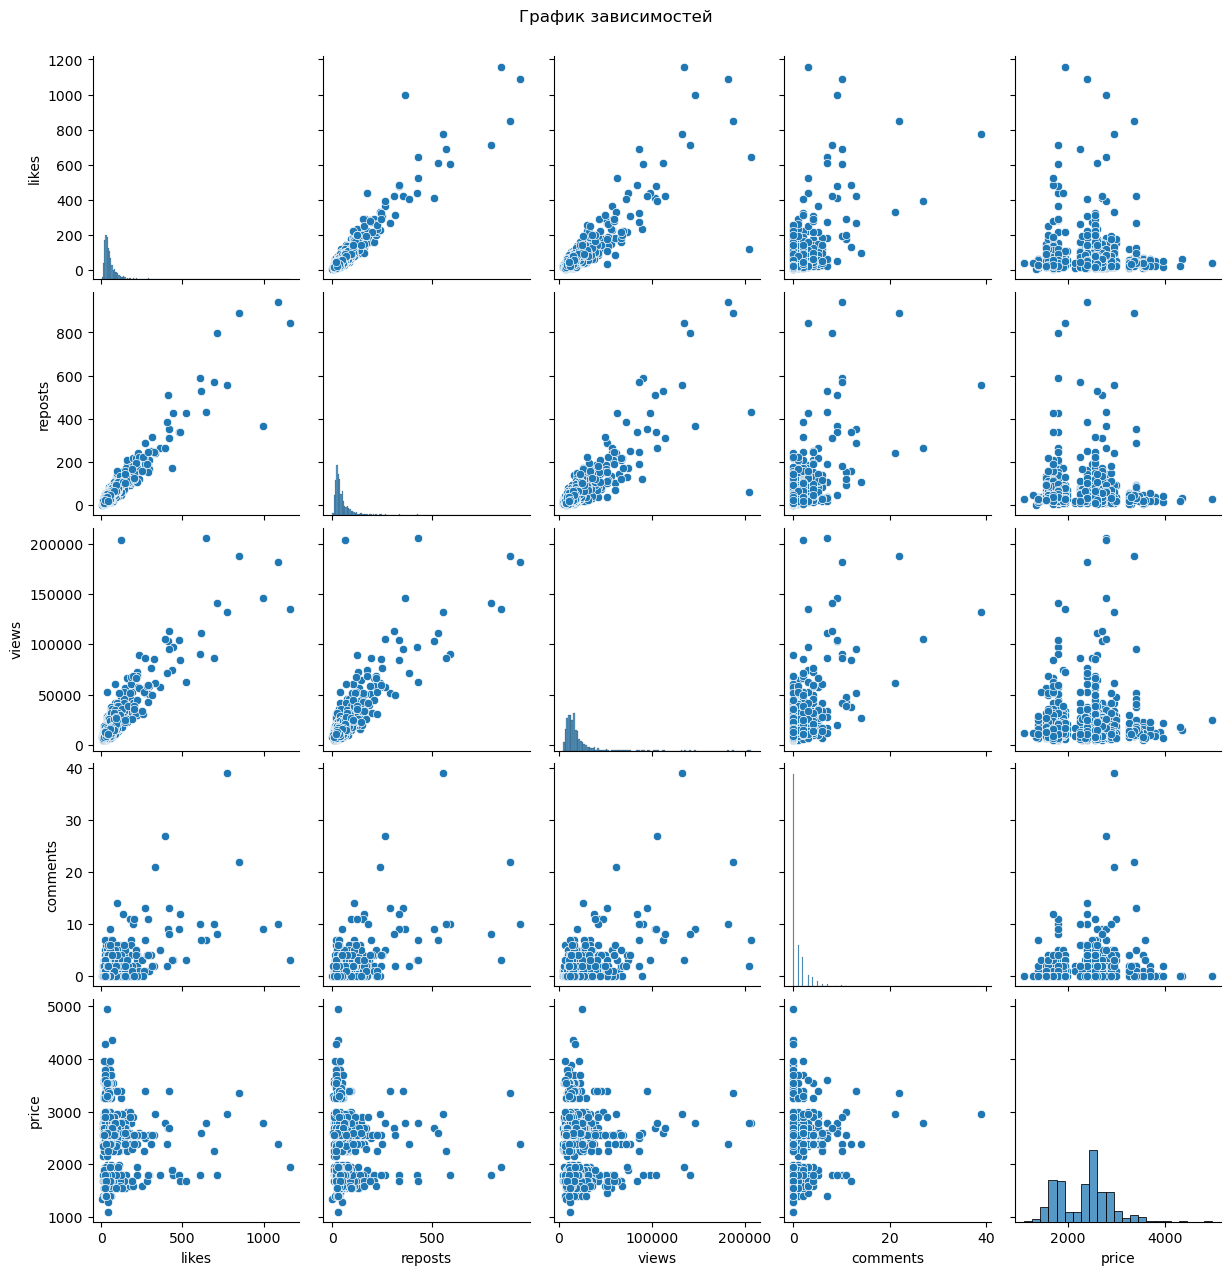

In [8]:
sns.pairplot(data)
plt.suptitle('График зависимостей', y=1.02)

Ярко выраженные линейные зависмости прослеживаются между: likes и reposts, views и likes, reposts и views. Проверим наличие и степень связи между указанными переменными через корреляционный анализ.

# Корреляционный анализ

Для начала построим корреляционную матрицу.

In [9]:
data.corr(numeric_only=True)

,likes,reposts,views,comments,price
likes,1.000000,0.947337,0.869501,0.587089,0.025729
reposts,0.947337,1.000000,0.836857,0.572701,0.002094
views,0.869501,0.836857,1.000000,0.559400,0.047776
comments,0.587089,0.572701,0.559400,1.000000,0.116295
price,0.025729,0.002094,0.047776,0.116295,1.000000


Визуализируем корреляционную матрицу зависимостей при помощи тепловой карты.

[Text(0.5, 1.0, 'Тепловая карта зависимостей')]

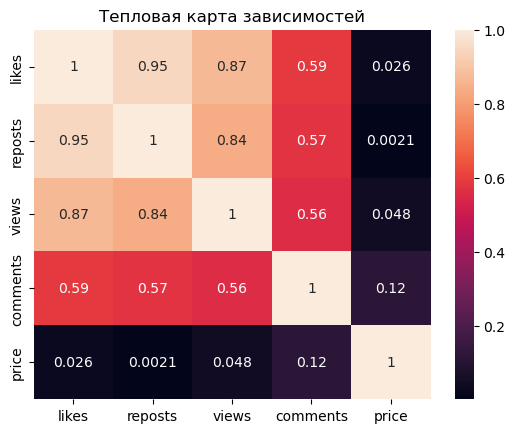

In [10]:
sns.heatmap(data.corr(numeric_only=True), annot=True).set(title='Тепловая карта зависимостей')

* Между признаками likes и reposts, действительно, существует сильная, положительная взаимосвязь с коэффициентом корреляции 0,95.
* Между признаками views и likes, действительно, существует сильная, положительная взаимосвязь с коэффициентом корреляции 0,87.
* Между признаками views и reposts, действительно, существует сильная, положительная взаимосвязь с коэффициентом корреляции 0,84.

Обратим внимание, что из всех целевых переменных с price наиболее взаимосвязаны comments: слабая положительная связь с коэффициентом корреляции 0,12.

**На данном этапе после просмотра зависимостей в качестве целевой переменной будет выбрана только перменная likes, поскольку из выявленных взаимосвязей именно она имеет наибольшую связь с другими признаками.**

# Взаимосвязь целевой переменной с ключевыми признаками

Посмотрим на выявленные зависимости.

Text(0.5, 1.02, 'График зависимостей')

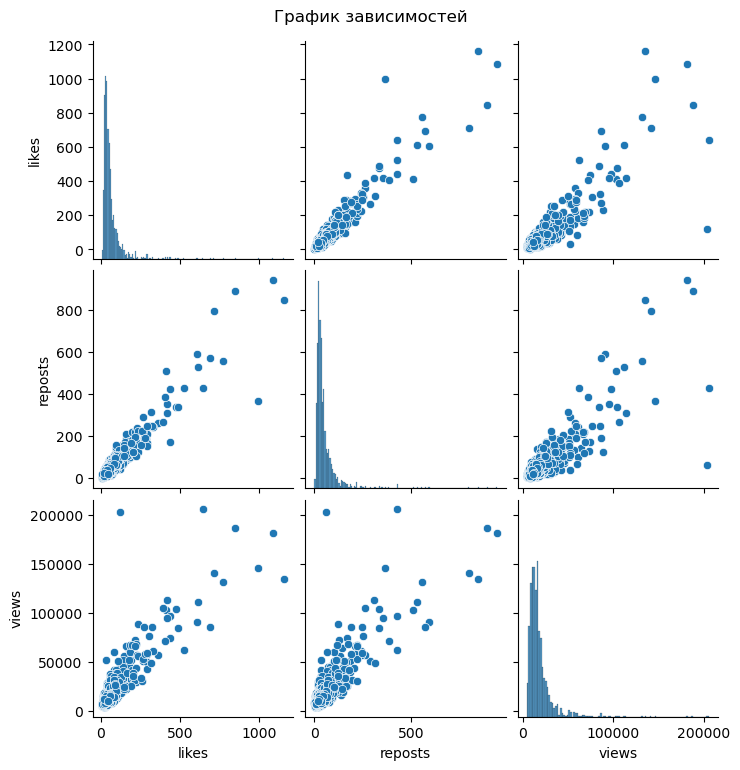

In [11]:
sns.pairplot(data[['likes', 'reposts', 'views']])
plt.suptitle('График зависимостей', y=1.02)

Детально рассмотрим взаимосвязь целевой переменной с ключевыми признаками для формулирования гипотез.

<Axes: title={'center': 'Диаграмма рассеяния лайков и количества репостов'}, xlabel='reposts', ylabel='likes'>

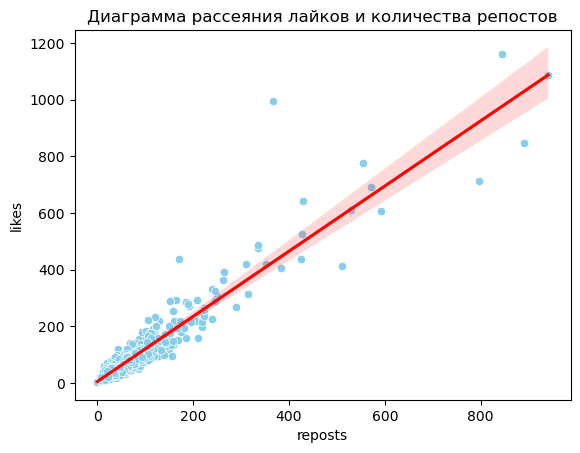

In [12]:
sns.scatterplot(x=data['reposts'], y=data['likes'], color='skyblue')
plt.xlabel('Количество репостов')
plt.ylabel('Количество лайков')
plt.title('Диаграмма рассеяния лайков и количества репостов')
sns.regplot(x=data['reposts'], y=data['likes'], scatter=False, color='red') 

На диаграмме рассеивания наблюдается сильная, ярковыраженная, положительная взаимосвязь между likes и reposts. Отсюда можем сформулировать **гипотезу H0**: наиболее репрезентативными метриками для оценки популярности поста являются likes и reposts.

<Axes: title={'center': 'Диаграмма рассеяния лайков и количества просмотров'}, xlabel='views', ylabel='likes'>

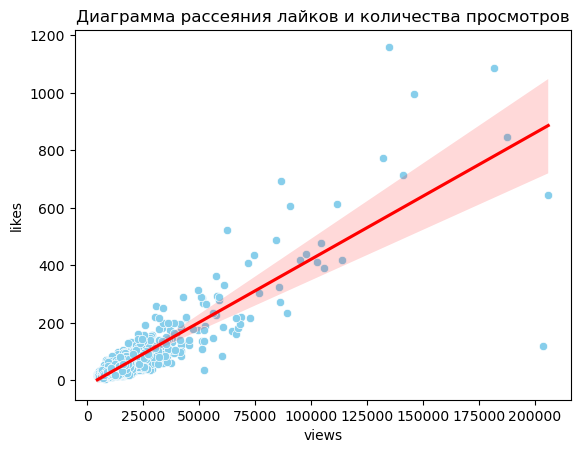

In [13]:
sns.scatterplot(x=data['views'], y=data['likes'], color='skyblue')
plt.xlabel('Количество просмотров')
plt.ylabel('Количество лайков')
plt.title('Диаграмма рассеяния лайков и количества просмотров')
sns.regplot(x=data['views'], y=data['likes'], scatter=False, color='red') 

На диаграмме рассеивания наблюдается сильная, выраженная, положительная взаимосвязь между likes и views. Поскольку для того, чтобы оценить пост, потенциальный покупатель должен его сначала увидеть, отсюда можем сформулировать **гипотезу H0**: положительное сонаправленное изменение likes и views отражает рост популярности поста.

<Axes: title={'center': 'Диаграмма рассеяния репостов и количества просмотров'}, xlabel='views', ylabel='reposts'>

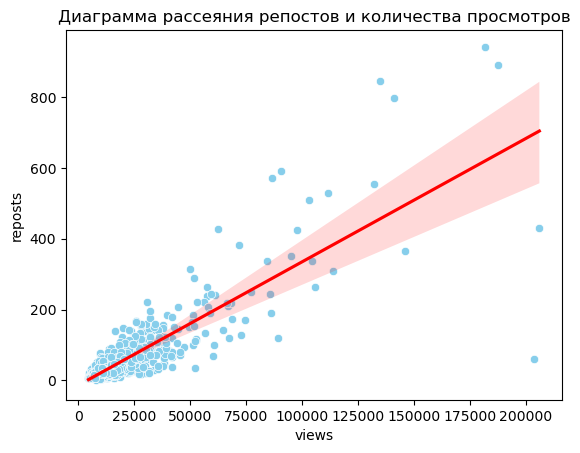

In [14]:
sns.scatterplot(x=data['views'], y=data['reposts'], color='skyblue')
plt.xlabel('Количество просмотров')
plt.ylabel('Количество репостов')
plt.title('Диаграмма рассеяния репостов и количества просмотров')
sns.regplot(x=data['views'], y=data['reposts'], scatter=False, color='red') 

На диаграмме рассеивания наблюдается сильная, выраженная, положительная взаимосвязь между reposts и views. Данная зависимость не затрагивает целевую переменную, но показывает еще раз, что просмостр поста потенциальным покупателем вызывает у него определенную реакцию, что еще раз доказывает необходимсоть анализа популярности постов для привлечения потенциальных клиентов и стимулирования продаж.

# Анализ признаков со слабой связью

В общем анализе зависимостей и корреляционном анализе была выявлена **слабая взаимосвзяь цены (price) и метрик популярности поста (likes, reposts, views, comments)**. 

Показатели, которые будут проанализированы:
- **price**
- **likes** (наша целевая переменная)
- **comments** (та переменная, с которой корреляция у цены сравнительно заметна)

Text(0.5, 1.02, 'График зависимостей')

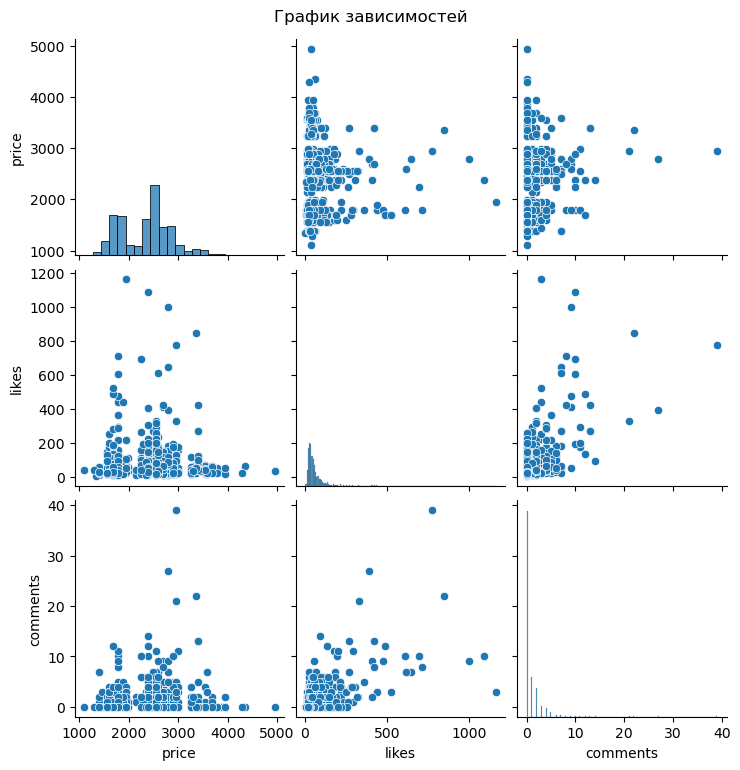

In [15]:
sns.pairplot(data[['price', 'likes', 'comments']])
plt.suptitle('График зависимостей', y=1.02)

Детальней посмотрим на **взаимосвяззь price и нашей целевой перменной (likes)**

<Axes: title={'center': 'Диаграмма рассеяния цены и количества лайков'}, xlabel='price', ylabel='likes'>

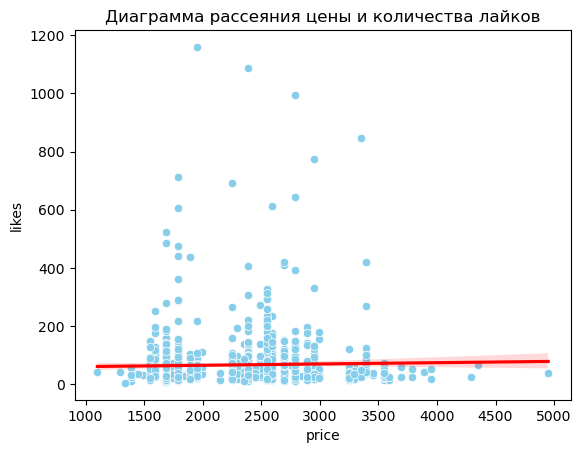

In [16]:
sns.scatterplot(x=data['price'], y=data['likes'], color='skyblue')
plt.xlabel('Цена товара')
plt.ylabel('Количество лайков')
plt.title('Диаграмма рассеяния цены и количества лайков')
sns.regplot(x=data['price'], y=data['likes'], scatter=False, color='red') 

Судя по линии тренда, количество лайков практически не зависит от цены (линия тренда лайков примерно постояна). Следовательно, сформулируем **гипотезу: Популярность поста и цена публикуемого товара практическки не связаны**. Это может объясняться тем, что пользователи (при решении ставить лайк или нет) обращают внимание на цену в последнюю очередь.  

Рассмотрим **зависимость между price и comments**

<Axes: title={'center': 'Диаграмма рассеяния цены и количества комментариев'}, xlabel='price', ylabel='comments'>

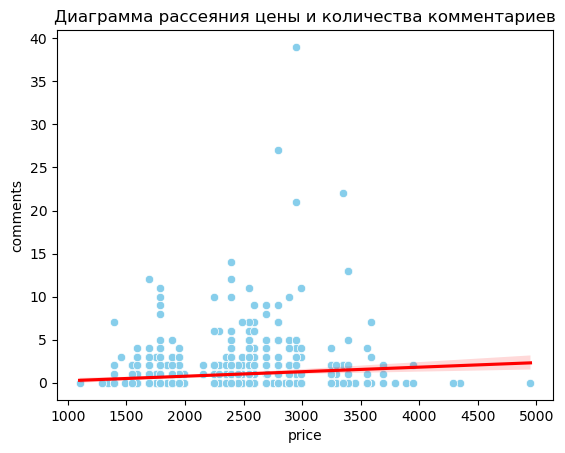

In [17]:
sns.scatterplot(x=data['price'], y=data['comments'], color='skyblue')
plt.xlabel('Цена товара')
plt.ylabel('Количество комментариев')
plt.title('Диаграмма рассеяния цены и количества комментариев')
sns.regplot(x=data['price'], y=data['comments'], scatter=False, color='red') 

Снова базируем наш анализ на линии тренда. Можем заметить, что по мере роста цены количество комментариев *слегка* увеличивается. Сформулируем нашу **гипотезу: Предположим, что цена публикуемого товара и количество комментариев имеют слабовыраженную положительную взаимосвязь**. Возможно, аудитория сообщества начинает возмущаться при сильно высокой цене (возможно завышенной)!

# Анализ категориальных признаков

Посмотрим, какие категории товаров из каталога магазина встречается в постах в соответствующем сообществе в ВК чаще всего.

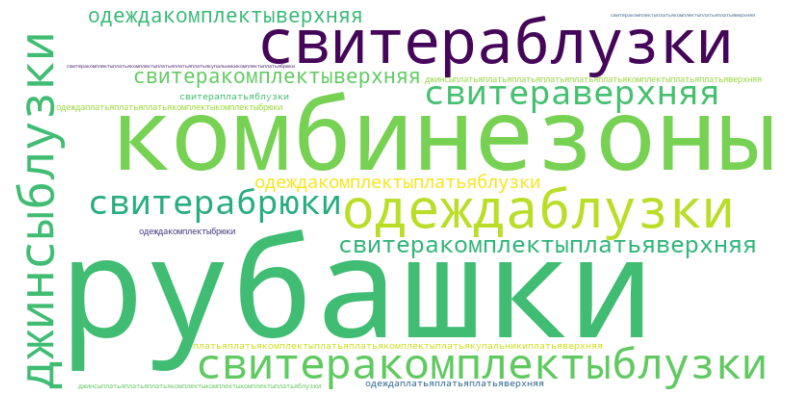

In [18]:
value=''.join(data['catalog_category'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(value)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Чаще всего магазин публикует посты с предложениями о продаже товаров из категорий блузки/рубашки/свитера и брюки/комбинезоны/джинсы. Наименьшую долю в постах занимают товары из категории платья, купальники и верхняя одежда. 

Посмотрим, является ли данная тактика по соотношению постов в паблике для магазина успешной с точки зренения привлечения потенциальных покупателей. Для этого посмотрим по столбчатым диаграммам товары какой категории из каталога набирают больше всего лайков, комментариев, просмотров и репостов.

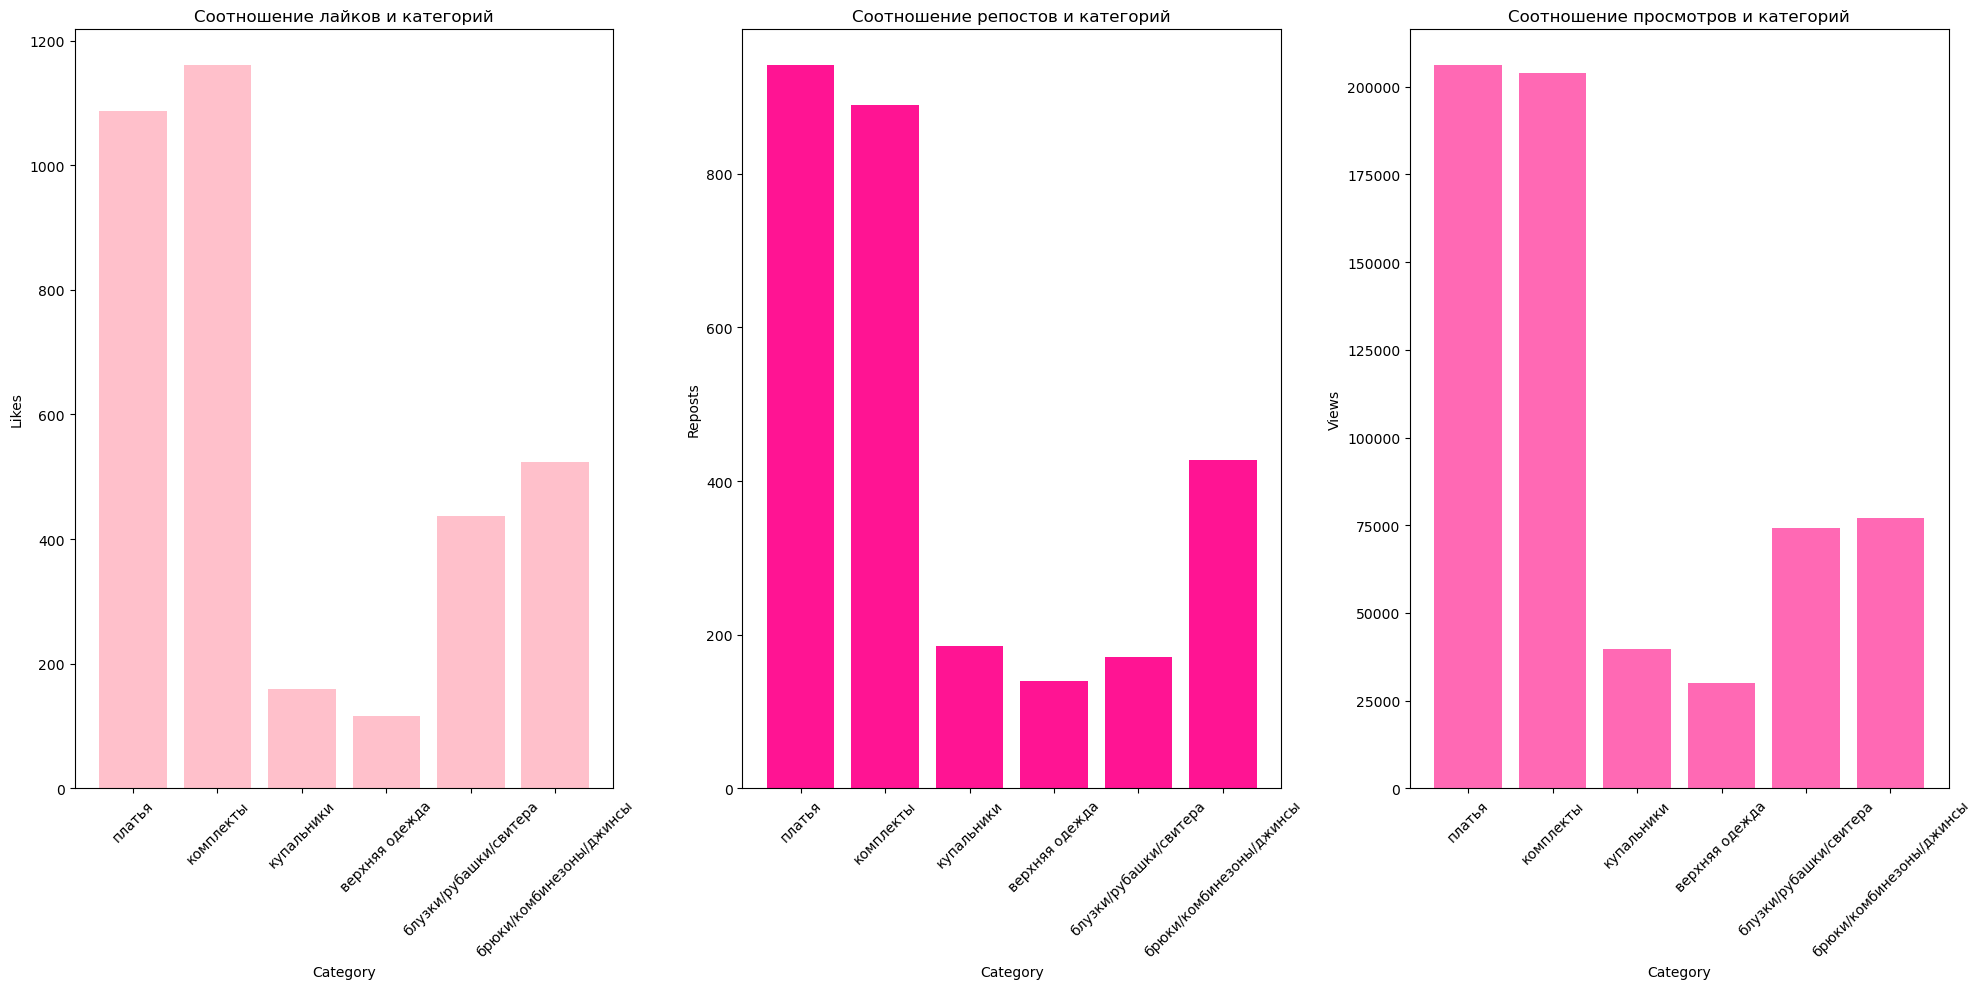

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.bar(data['catalog_category'], data['likes'], color='pink')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.title('Соотношение лайков и категорий')

plt.subplot(1, 3, 2)
plt.bar(data['catalog_category'], data["reposts"], color='deeppink')
plt.xlabel('Category')
plt.ylabel('Reposts')
plt.xticks(rotation=45)
plt.title('Соотношение репостов и категорий')

plt.subplot(1, 3, 3)
plt.bar(data['catalog_category'], data['views'], color='hotpink')
plt.xlabel('Category')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.title('Соотношение просмотров и категорий')

plt.tight_layout()
plt.show()


Рассмотрев графики, можем сделать вывод, что наиболее популярные категории по трем метрикам (Лайки, Репосты и Просмотры) - это Платья и Комплекты. Отметим, что Комплекты предпочтительнее по лайкам, а Платья по репостам. Наименее популярной категорией является Верхняя одежда вне зависимости от метрики.

Теперь посмотрим на динамику некоторых показателей постов сообщества во времени. Построим линейные графики зависимости лайков, репостов, просмотров, комментариев от времени и сделаем выводы:

Поскольку значения минут не влияют на наши графики, то для построения графиков возьмем среднее время, т.е. только значение часов, для этого напишем функцию:

In [22]:
def round_time_to_hour(time_str):
    """ 
     Округляет время до часов     
    Parameters 
    ---------- 
    text : datetime 
       Время, которое необходимо округлить
    Returns 
    ------- 
    datetime 
        Время округленное до часов 
    """ 
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S')
    rounded_time = time_obj.replace(minute=0, second=0, microsecond=0)
    return rounded_time.strftime('%H:%M:%S')

data['time'] = data['time'].apply(round_time_to_hour)
data.head()

,date,likes,reposts,views,comments,name,price,product_category,catalog_category,time,time_category
0,11.04.2024,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами,2590,платья,платья,12:00:00,дневное
1,11.04.2024,23,19,4581,0,Трикотажные платья-макси с открытой спинкой,2690,платья,платья,07:00:00,утреннее
2,09.04.2024,40,35,9721,0,Хлопковые костюмы с жилетом,2690,костюмы,комплекты,10:00:00,утреннее
3,09.04.2024,37,21,6313,0,Идеальное пляжное платье с открытой спинкой,2550,платья,платья,08:00:00,утреннее
4,09.04.2024,35,22,10655,0,Трикотажные платья-бандо по фигуре,2550,платья,платья,06:00:00,утреннее


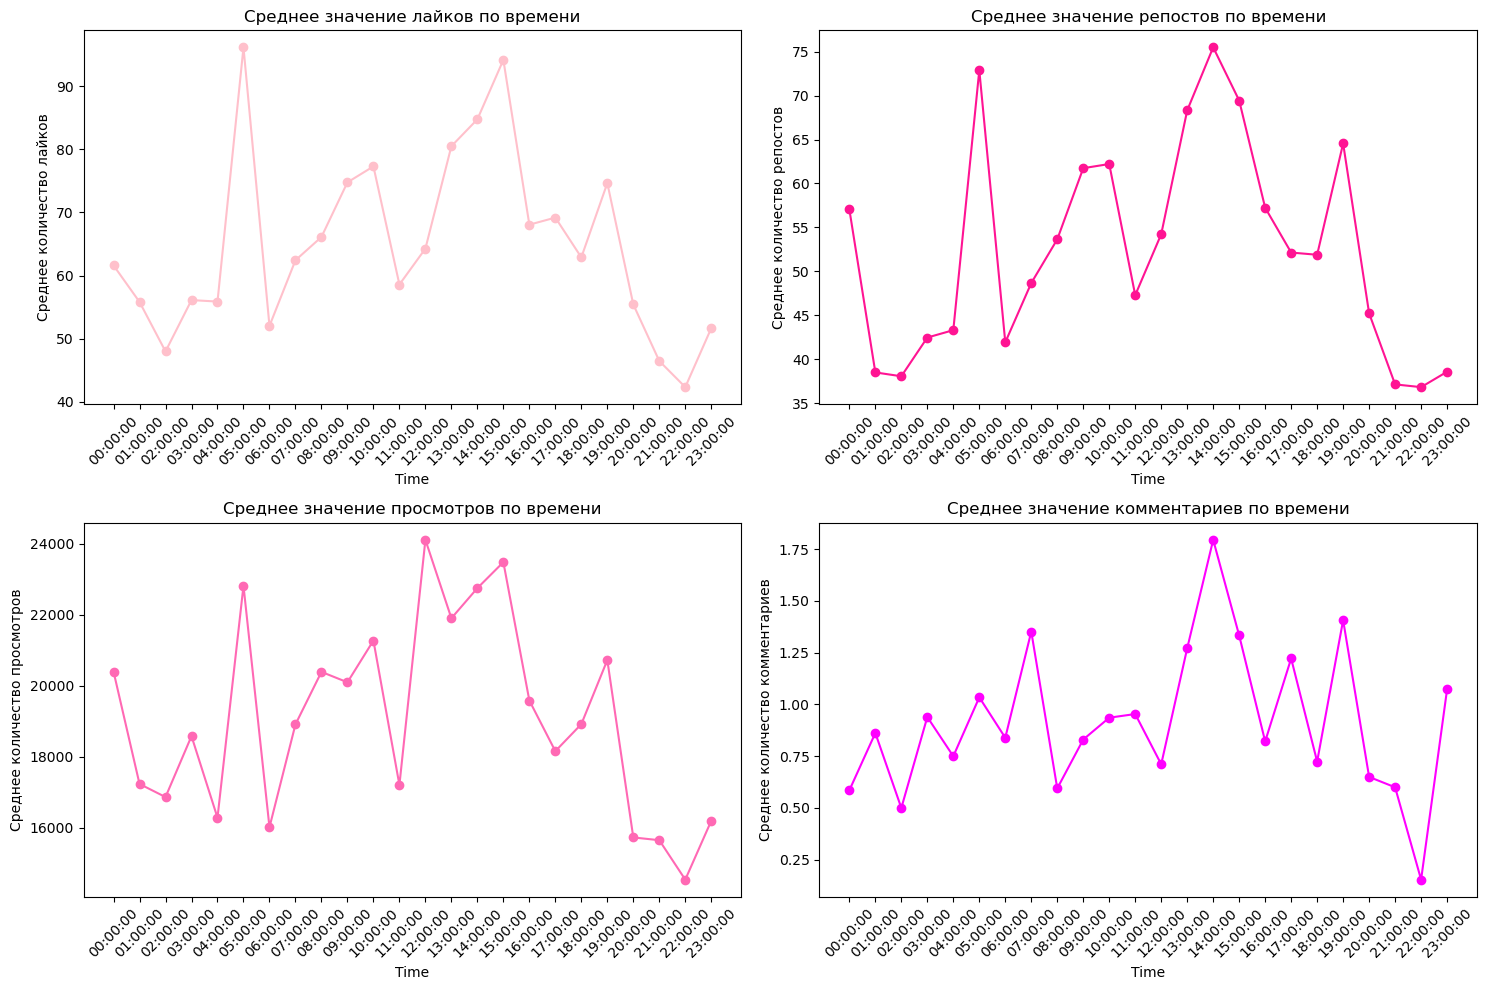

In [23]:
# Группировка данных по времени 
data_grouped = data.groupby('time')[['likes', 'reposts', 'views', 'comments']].mean() 
 
# Указание размеров графика 
plt.figure(figsize=(15, 10))   

# График зависимости лайков от времени 
plt.subplot(2, 2, 1)   
plt.plot(data_grouped.index, data_grouped['likes'], marker='o', color='pink')   
plt.xlabel('Time')   
plt.ylabel('Среднее количество лайков')   
plt.title('Среднее значение лайков по времени')
plt.xticks(rotation=45)   

# График зависимости репостов от времени 
plt.subplot(2, 2, 2)   
plt.plot(data_grouped.index, data_grouped['reposts'], marker='o', color='deeppink')   
plt.xlabel('Time')   
plt.ylabel('Среднее количество репостов')   
plt.title('Среднее значение репостов по времени')   
plt.xticks(rotation=45)   

# График зависимости просмотров от времени 
plt.subplot(2, 2, 3)   
plt.plot(data_grouped.index, data_grouped['views'], marker='o', color='hotpink')   
plt.xlabel('Time')   
plt.ylabel('Среднее количество просмотров')   
plt.title('Среднее значение просмотров по времени')   
plt.xticks(rotation=45)   

# График зависимости комментариев от времени 
plt.subplot(2, 2, 4)   
plt.plot(data_grouped.index, data_grouped['comments'], marker='o', color='magenta')   
plt.xlabel('Time')   
plt.ylabel('Среднее количество комментариев')   
plt.title('Среднее значение комментариев по времени')   
plt.xticks(rotation=45)   

plt.tight_layout()   
plt.show()


По графикам видно, что пользователи наиболее активны в промежуток с 11 до 14, т.е. они ставят лайки, репостят, комментируют и смотрят посты. Удивительно, что люди также активны и в ночное время суток с 3 до 5 утра. Выделим, что посты, выложенные в 21 (в вечернее время суток), менее популярны, чем остальные.

Для подтвеждения наших выводов рассмиотрим столбчатые диаграммы для лайков, репостов, просмотров, комментариев от категории времени:

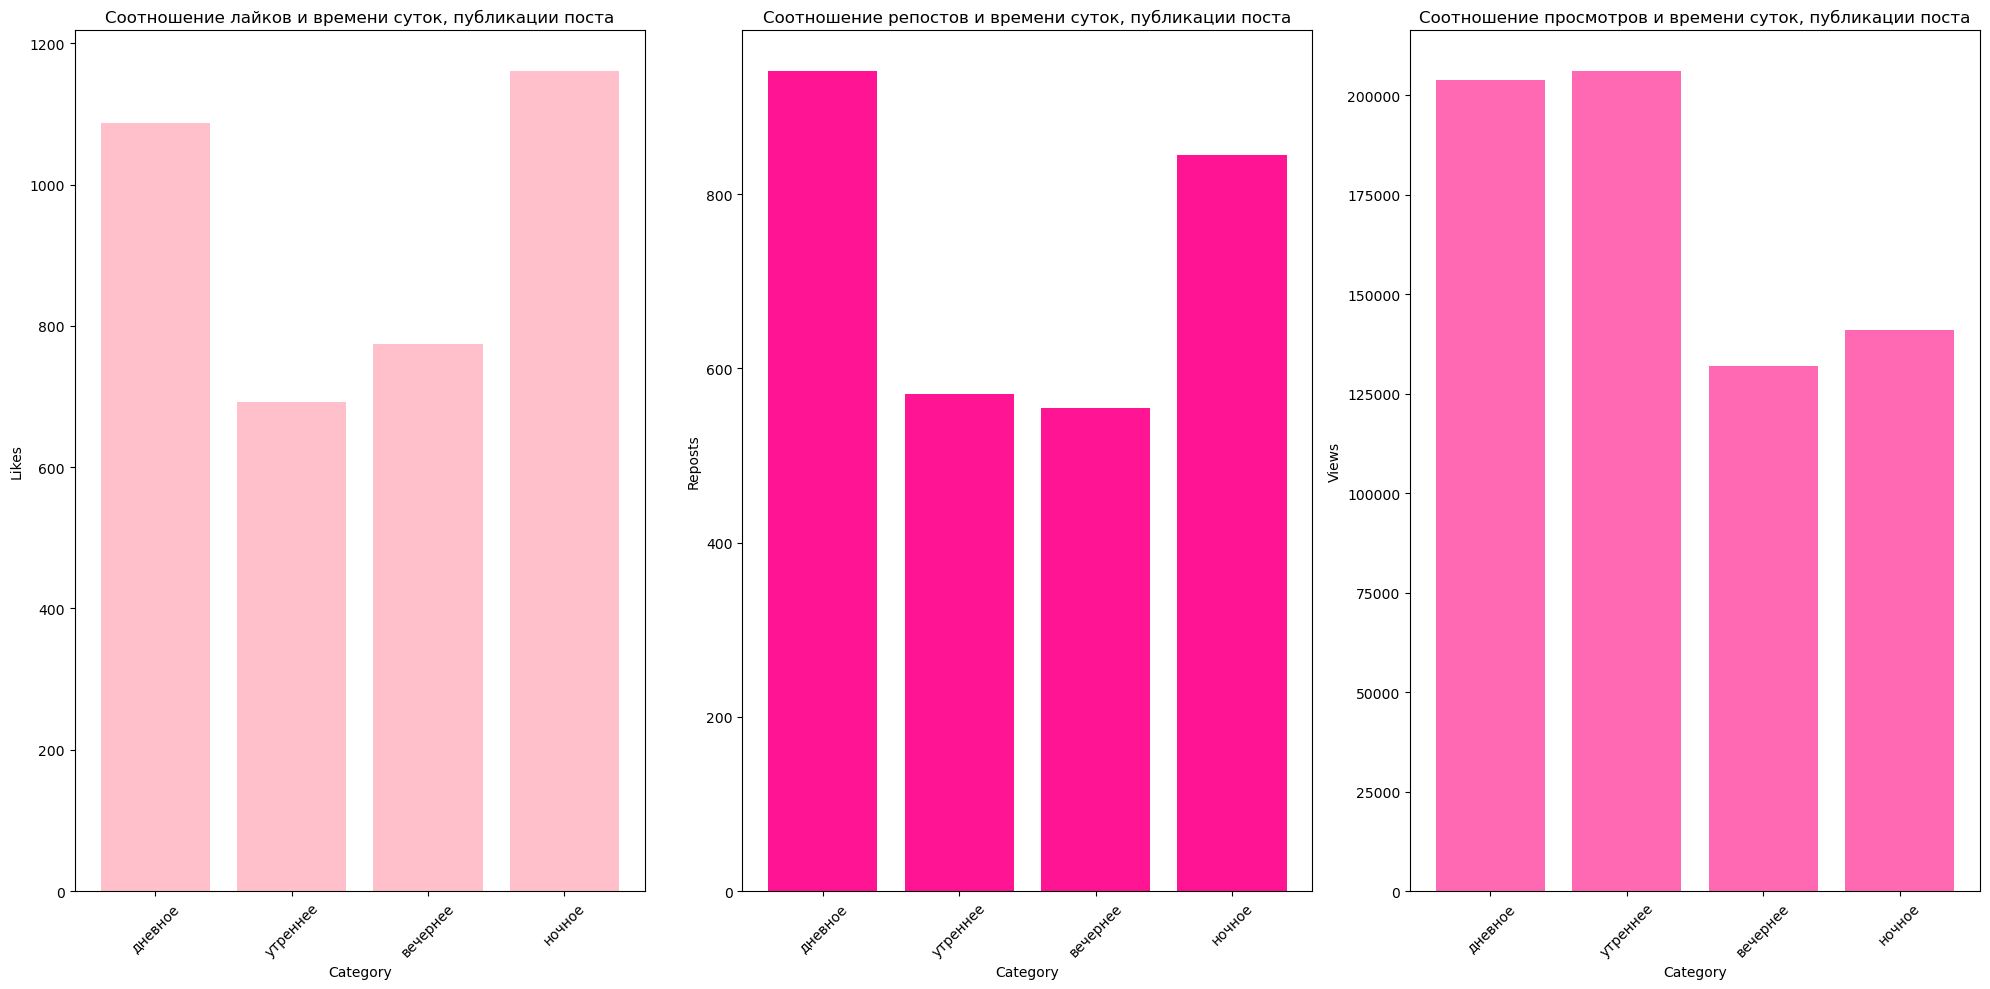

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.bar(data['time_category'], data['likes'], color='pink')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.title('Соотношение лайков и времени суток, публикации поста')

plt.subplot(1, 3, 2)
plt.bar(data['time_category'], data["reposts"], color='deeppink')
plt.xlabel('Category')
plt.ylabel('Reposts')
plt.xticks(rotation=45)
plt.title('Соотношение репостов и времени суток, публикации поста')

plt.subplot(1, 3, 3)
plt.bar(data['time_category'], data['views'], color='hotpink')
plt.xlabel('Category')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.title('Соотношение просмотров и времени суток, публикации поста')

plt.tight_layout()
plt.show()

Эти графики подтверждают выводы, сделанные в предыдущем пункте. Видно, что пользователи активнее смотрят посты в утренее-дневное время суток. Отметим, что лайки ставят чаще в ночное время суток, что коррелируется с репостами, где это второй по популярности период, после дневного времени сток. Интересно, что утром, несмотря на большое количество просмотров, посты отмечаются, как понравившиеся меньше всего. Вечер- это период, в который пользователи почти не активны, что можно заметить по таким метрикам, как репосты и просмотры. 

Теперь посмотрим на метрики, связанными с ценой товара.

Для начала посмотрим, как цена зависит от категории товрара.

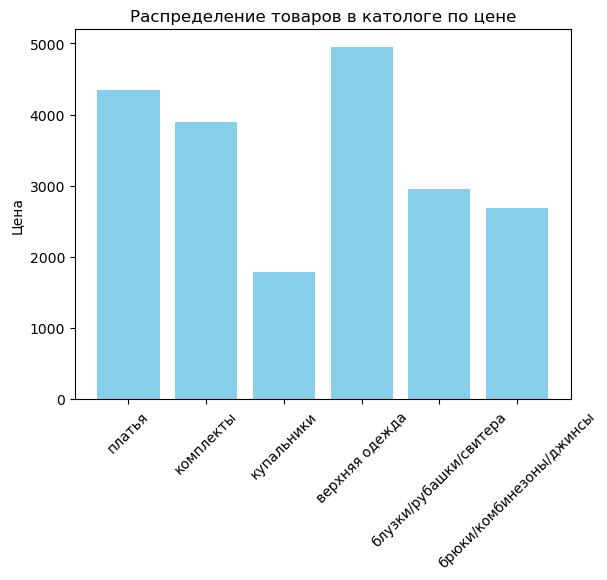

In [35]:
x = data['catalog_category']
y = data['price']

plt.bar(x, y, color='skyblue')

plt.ylabel('Цена')
plt.title('Распределение товаров в катологе по цене')

plt.xticks(rotation=45)
plt.show()

Наиболее дорогими являются товары из категорий верхняя одежда и платья. Интересно, что товары этих категорий реже всего встречаются в постах, хотя могли бы потенциально принести наибольшую прибыль. Категории, которые чаще всего встречаются в постах, относятся к среднему ценовому сегменту. 

Посмотрим, зависит ли популярность поста (метрики лайков, комментариев, просмотров и репостов) от категории товара в посте (и соответственно его ценового сегмента) или такая пропорция в распределении постов владельцами магазина не намеренная.

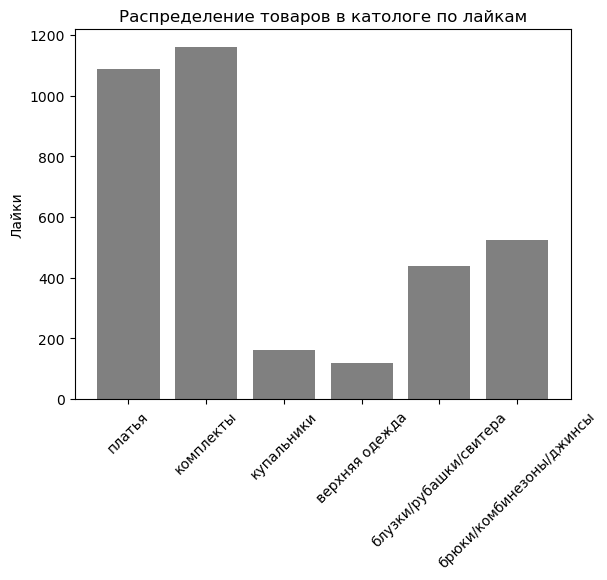

In [36]:
y1 = data['likes']

plt.bar(x, y1, color='grey')

plt.ylabel('Лайки')
plt.title('Распределение товаров в катологе по лайкам')

plt.xticks(rotation=45)
plt.show()

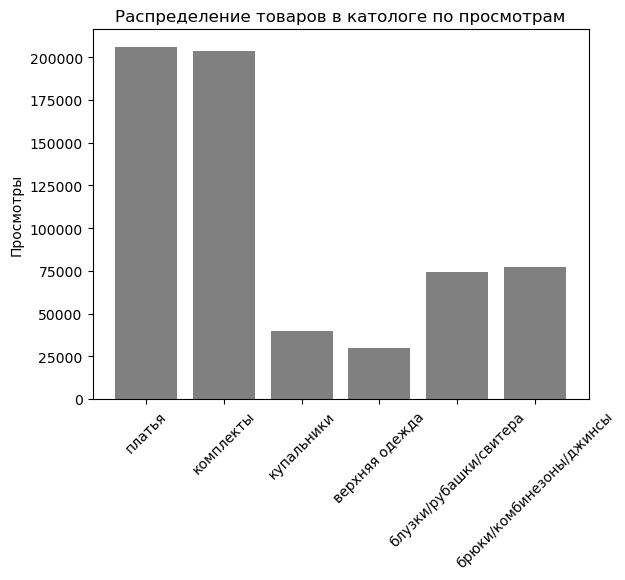

In [37]:
y2 = data['views']

plt.bar(x, y2, color='grey')

plt.ylabel('Просмотры')
plt.title('Распределение товаров в катологе по просмотрам')

plt.xticks(rotation=45)
plt.show()

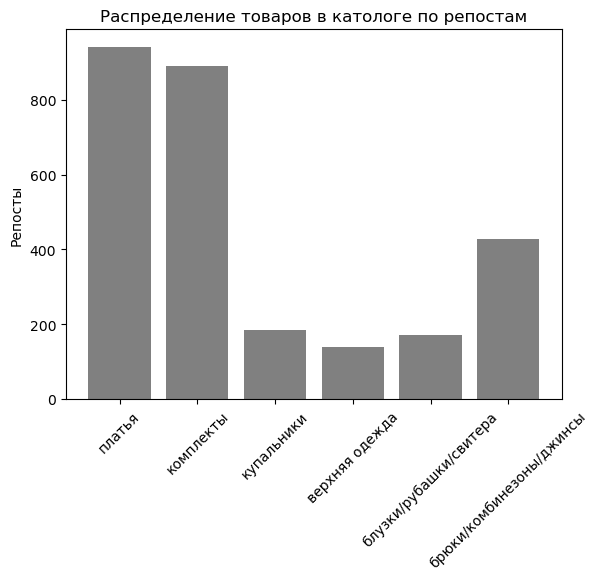

In [38]:
y3 = data['reposts']

plt.bar(x, y3, color='grey')

plt.ylabel('Репосты')
plt.title('Распределение товаров в катологе по репостам')

plt.xticks(rotation=45)
plt.show()

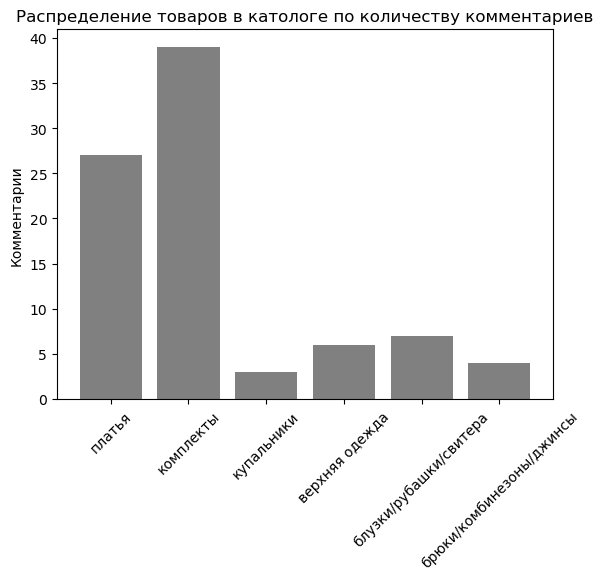

In [39]:
y4 = data['comments']

plt.bar(x, y4, color='grey')

plt.ylabel('Комментарии')
plt.title('Распределение товаров в катологе по количеству комментариев')

plt.xticks(rotation=45)
plt.show()

**Вывод:** наибольшей популярностью по рассмотренным метрикам пользуются среди потенциальных покупателей посты с товарами из категорий комплекты и платья, хотя товары из этих категорий не так часто встречаются в постах паблика изучаемого магазина. Кроме того, платья являются одной из самых дорогих категорий каталога, поэтому владельцам паблика и магазина следует обратить внимание на количнство постов с платьями, которое публикуется у них в сообществе. Интересен момент, что товары из категории блузки/рубашки/свитера, которые являются лидерами по количеству постов не так уж и популярны среди пользователей по рассмотренным метрикам.

Далее на основе выявленных зависимостей выделим новый признак для дальнейшего анализа.

# Выделение нового признака

Из EDA-анализа было установлено, что категории товаров в катологе различаются по цене, более того, товары из разных категорий неодинаково популярны среди потенциальных покупателей, поэтому распределим товары в несколько ценовых категорий, выделив новый признак price_category, который будет показывать к какой ценовой категории относится товар, публикуемый в посте. Из аналаза распределния категорий товаров в каталоге по цене выделим следующие ценовые категории:

* дешёвый (до 2000)
* средний (до 4000)
* дорогой (выше 4000)

Напишем функцию для разбиения товаров на ценовые категории.

In [40]:
def categorize_price(x):
    if x<=2000:
        return 'дешёвый'
    elif x>2000 and x<4000:
        return 'средний'
    else:
        return 'дорогой'

In [41]:
data['price_category'] = data['price'].map(categorize_price)
data

,date,likes,reposts,views,comments,name,price,product_category,catalog_category,time,time_category,price_category
0,11.04.2024,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами,2590,платья,платья,12:00:00,дневное,средний
1,11.04.2024,23,19,4581,0,Трикотажные платья-макси с открытой спинкой,2690,платья,платья,07:00:00,утреннее,средний
2,09.04.2024,40,35,9721,0,Хлопковые костюмы с жилетом,2690,костюмы,комплекты,10:00:00,утреннее,средний
3,09.04.2024,37,21,6313,0,Идеальное пляжное платье с открытой спинкой,2550,платья,платья,08:00:00,утреннее,средний
4,09.04.2024,35,22,10655,0,Трикотажные платья-бандо по фигуре,2550,платья,платья,06:00:00,утреннее,средний
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,17.02.2023,30,31,11002,0,Платье-свитер в полосочку на молнии,2390,платья,платья,02:00:00,ночное,средний
1212,16.02.2023,28,36,8779,0,Тройной купальник с высокой посадкой,1690,купальники,купальники,23:00:00,ночное,дешёвый
1213,16.02.2023,35,35,10657,2,Комплект с юбкой и джемпером,3290,платья,платья,20:00:00,вечернее,средний
1214,16.02.2023,20,22,12509,0,Боди с ассиметричным вырезом,1550,боди,блузки/рубашки/свитера,15:00:00,дневное,дешёвый


# Идеи для МО

Из проделанного EDA-анализа было выявлено, что лайки являются наиболее репрезентативной метрикой для предсказания популярности постов сообщества. Чтобы предсказывать целевую переменную likes будут использованы признаки, от которых likes зависят напрямую согласно проведенному корреляционному анализу: что лайки зависят от просмотров (прежде чем поставить лайк, человек сначала должен увидеть пост) и от репостов (человеку пересылают пост, он его видит, и если он ему понравился - потенциальный клиент поставит лайк, прореагировав тем самым на продаваемый магазином товар). Также будет проведено OHE-кодирование, посредством которого планируется подключить к прогнозу популярности категорию товара согласно каталогу магазина и время суток публикации поста, так как в этих признаках были выявлены интересные закономерности распределения метрик популярности (лайки, репосты, просмотры, комментарии) в ходе EDA-анализа и визуализации. Для уточнения модели она может быть дополнена ценой товара, но как было установлено при анализе зависимостей, цена в явном виде не определяет популярность поста, поэтому, вероятно, вместо неё будет внедрен новый признак ценовой категории, полученный из анализа зависимостей.